In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

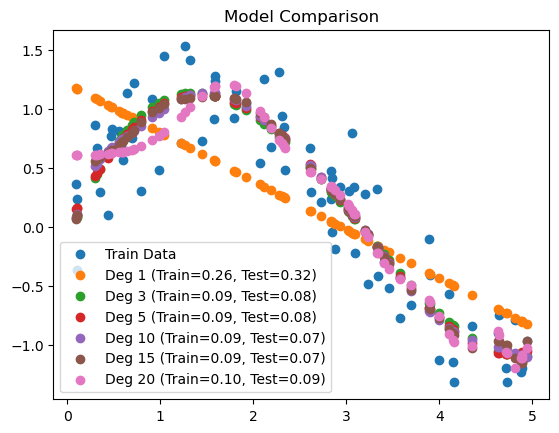

In [29]:
# Dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X) + 0.3 * np.random.randn(100, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

degrees = [1, 3, 5, 10, 15, 20]

plt.figure()
plt.scatter(X_train, y_train, label="Train Data")

for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    plt.scatter(X_train, y_train_pred,
             label=f"Deg {deg} (Train={train_mse:.2f}, Test={test_mse:.2f})")

plt.legend()
plt.title("Model Comparison")
plt.show()

In [31]:
print("\nModel Performance Summary:")
for deg in degrees:
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"Degree {deg}: Test MSE = {test_mse:.3f}")



Model Performance Summary:
Degree 1: Test MSE = 0.321
Degree 3: Test MSE = 0.078
Degree 5: Test MSE = 0.077
Degree 10: Test MSE = 0.067
Degree 15: Test MSE = 0.071
Degree 20: Test MSE = 0.092


# Model Comparison – Polynomial Regression

## Objective
The goal of this analysis is to compare regression models of increasing complexity and evaluate their ability to capture nonlinear structure while maintaining good generalization performance.

We examine polynomial regression models of varying degrees to illustrate the bias–variance tradeoff and the impact of model complexity on training and test error.

---

## Dataset
A synthetic nonlinear dataset was generated using:

- Input feature: \( X \sim U(0, 5) \)
- Target variable: \( y = \sin(X) + \text{Gaussian noise} \)

This dataset intentionally contains noise to simulate realistic measurement uncertainty and prevent trivial fits.

The data was split into:

- **Training set** (75%)
- **Test set** (25%)

---

## Models Evaluated
Polynomial regression models with degrees:

- Degree 1 (Linear regression)
- Degree 3
- Degree 5
- Degree 10
- Degree 15
- Degree 20

Each model was trained on the training set and evaluated using Mean Squared Error (MSE).

---

## Evaluation Metrics
We report:

- **Training MSE** → Fit quality on seen data  
- **Test MSE** → Generalization to unseen data  

Test error is the primary criterion for model selection.

---

## Results & Interpretation

### **Degree 1 (Linear Regression)**
- Fails to capture sinusoidal structure
- High training and test error

**Conclusion:** Underfitting (high bias)

---

### **Degrees 3 & 5**
- Successfully capture underlying nonlinear trend
- Low training and test errors
- Smooth functional behavior

**Conclusion:** Good bias–variance balance

---

### **Degrees 10 & 15**
- Slight improvement in test MSE
- Increased flexibility without clear overfitting

**Conclusion:** Additional complexity still beneficial

---

### **Degree 20**
- Test error increases
- Slight degradation in performance
- Visual fit shows increased oscillatory behavior

**Conclusion:** Early signs of overfitting (high variance)

---

## Key Insight – Bias–Variance Tradeoff
As model complexity increases:

- Training error generally decreases
- Test error initially decreases, then increases

This behavior reflects:

- **Low complexity → High bias (underfitting)**
- **Moderate complexity → Optimal generalization**
- **High complexity → High variance (overfitting)**

---

## Model Selection Considerations
Although Degree 10–15 models achieve the lowest test MSE, Degrees 3–5 may be preferred in practice due to:

- Lower variance risk
- Greater stability
- Improved interpretability
- Comparable predictive performance

---

## Conclusion
This comparison demonstrates that:

- Model complexity must be balanced against generalization
- Lowest training error does not guarantee best performance
- Test/validation metrics are essential for reliable selection

The bias–variance tradeoff provides a fundamental framework for understanding model behavior and preventing overfitting.

---
